In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
grains = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/unsupervised_learning/datasets/grains.csv')
fish = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/unsupervised_learning/datasets/fish.csv', header=None)
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/unsupervised_learning/datasets/wine.csv')
eurovision = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/unsupervised_learning/datasets/eurovision-2016.csv')
stocks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/unsupervised_learning/datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
digits = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/unsupervised_learning/datasets/lcd-digits.csv', header=None)

Grains dataset preview:


,0,1,2,3,4,5,6,variety_number,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama wheat
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,Canadian wheat
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,Canadian wheat
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,Canadian wheat
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,Canadian wheat



Part 1: Hierarchical Clustering on Grains Dataset


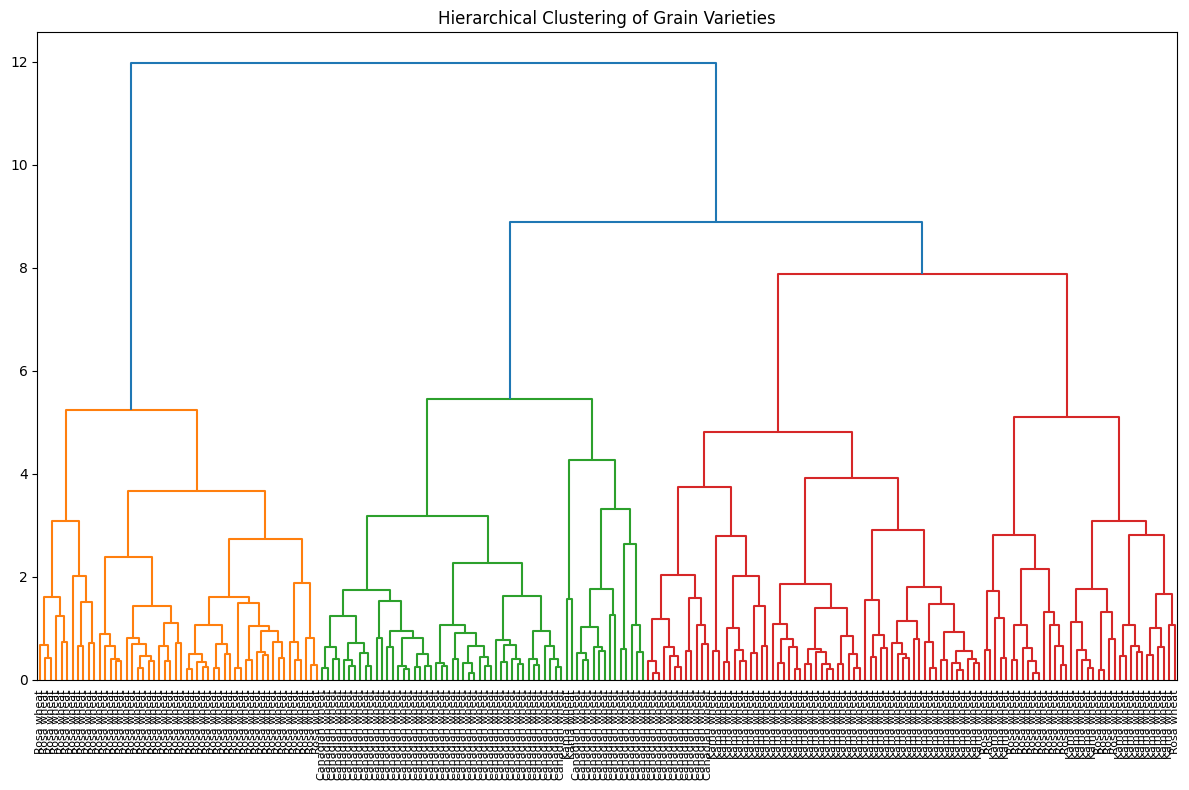

In [ ]:
print("Grains dataset preview:")
display(grains)

print("\nPart 1: Hierarchical Clustering on Grains Dataset")
samples = grains.drop('variety', axis=1).values
variety = grains['variety'].values

merging = linkage(samples, method='complete')

plt.figure(figsize=(12, 8))
dendrogram(merging,
           labels=variety,
           leaf_rotation=90,
           leaf_font_size=8)
plt.title('Hierarchical Clustering of Grain Varieties')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels = fcluster(merging, 15, criterion='distance')
pairs = pd.DataFrame({'labels': labels, 'variety': variety})
print("Cluster labels and varieties:")
print(pairs.sort_values('labels'))


ct_grains = pd.crosstab(pairs['labels'], pairs['variety'])
print("\nCrosstab of cluster labels vs. grain varieties:")
print(ct_grains)

Cluster labels and varieties:
     labels         variety
0         1      Kama wheat
1         1      Kama wheat
2         1      Kama wheat
3         1      Kama wheat
4         1      Kama wheat
..      ...             ...
205       1  Canadian wheat
206       1  Canadian wheat
207       1  Canadian wheat
208       1  Canadian wheat
209       1  Canadian wheat

[210 rows x 2 columns]

Crosstab of cluster labels vs. grain varieties:
variety  Canadian wheat  Kama wheat  Rosa wheat
labels                                         
1                    70          70          70


In [ ]:
print("\nPart 2: K-means clustering on Fish Dataset")
fish_features = fish.iloc[:, 1:].values
fish_species = fish.iloc[:, 0].values


Part 2: K-means clustering on Fish Dataset


In [ ]:
kmeans_model = KMeans(n_clusters=len(np.unique(fish_species)), random_state=42)
kmeans_model.fit(fish_features)

lab = kmeans_model.predict(fish_features)

df_fish = pd.DataFrame({'labels': lab, 'species': fish_species})

Crosstab of K-means labels vs. fish species:
species  Bream  Pike  Roach  Smelt
labels                            
0           16     2      0      0
1            1     1     17     14
2           17    10      3      0
3            0     4      0      0

Part 3: Pipeline with StandardScaler and K-means
Crosstab of pipeline labels vs. fish species:
species  Bream  Pike  Roach  Smelt
labels                            
0           31     0      0      0
1            0     0      0     14
2            3     0     20      0
3            0    17      0      0

Part 4: PCA on Grains Dataset
Original grains features shape: (210, 8)
PCA transformed features shape: (210, 8)


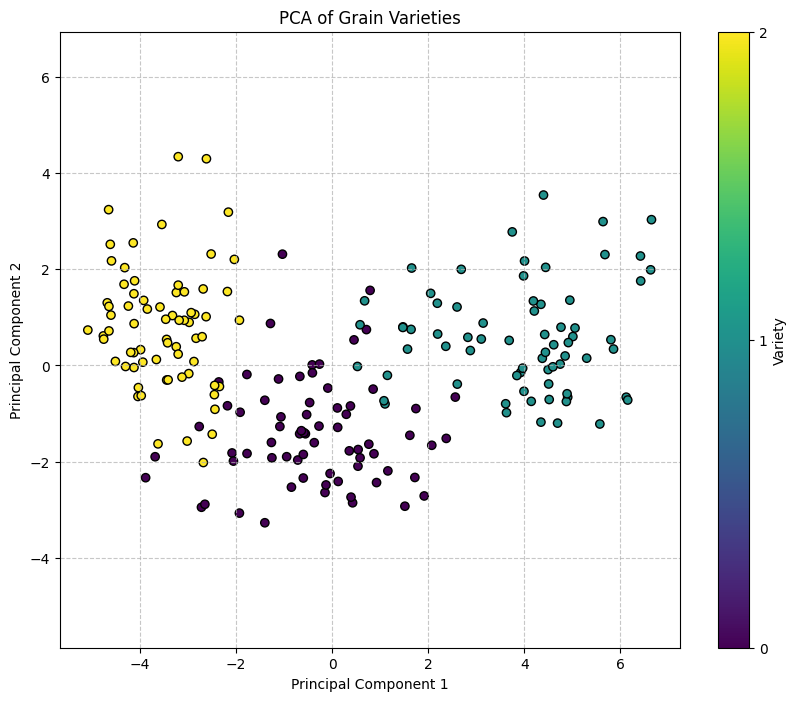

In [ ]:
ct_fish = pd.crosstab(df_fish['labels'], df_fish['species'])
print("Crosstab of K-means labels vs. fish species:")
print(ct_fish)

print("\nPart 3: Pipeline with StandardScaler and K-means")
pipeline = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=len(np.unique(fish_species)), random_state=42)
)

pipeline.fit(fish_features)
pipeline_labels = pipeline.predict(fish_features)
df_pipeline = pd.DataFrame({'labels': pipeline_labels, 'species': fish_species})

ct_pipeline = pd.crosstab(df_pipeline['labels'], df_pipeline['species'])
print("Crosstab of pipeline labels vs. fish species:")
print(ct_pipeline)

print("\nPart 4: PCA on Grains Dataset")
pca_model = PCA()
pca_features = pca_model.fit_transform(samples)

print("Original grains features shape:", samples.shape)
print("PCA transformed features shape:", pca_features.shape)

plt.figure(figsize=(10, 8))
variety_num = pd.factorize(variety)[0]
plt.scatter(pca_features[:, 0], pca_features[:, 1],c = variety_num, cmap='viridis', edgecolor='k')
plt.colorbar(ticks=range(len(np.unique(variety))), label='Variety')
plt.title('PCA of Grain Varieties')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Correlation between PC1 and PC2: 0.000000 (p-value: 1.000000)


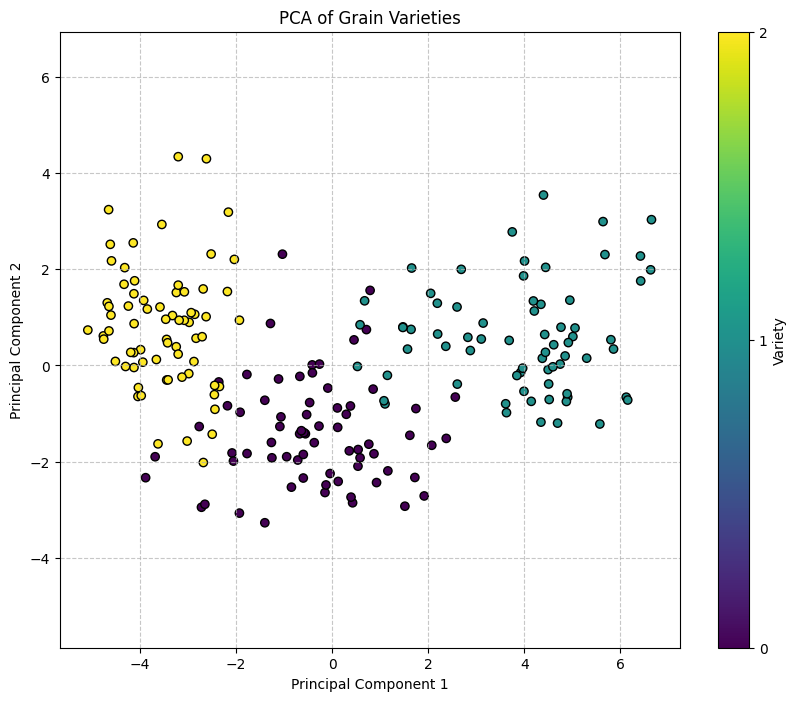

Correlation between width and length: 0.994341 (p-value: 0.000000)

Variance explained by each principal component:
[7.95726424e-01 1.70356288e-01 2.90096526e-02 3.98304302e-03
 6.20590591e-04 1.93994457e-04 1.08153388e-04 1.85402750e-06]
Total variance explained by first two components: 0.9661


In [ ]:
correlation, pvalue = pearsonr(pca_features[:, 0], pca_features[:, 1])
print(f"Correlation between PC1 and PC2: {correlation:.6f} (p-value: {pvalue:.6f})")


if samples.shape[1] >= 2:
    width = samples[:, 0]
    length = samples[:, 1]
    plt.figure(figsize=(10, 8))
    variety_num = pd.factorize(variety)[0]
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=variety_num, cmap='viridis', edgecolor='k')
    plt.colorbar(ticks=range(len(np.unique(variety_num))), label='Variety')
    plt.title('PCA of Grain Varieties')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.axis('equal')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    corr_original, pval_original = pearsonr(width, length)
    print(f"Correlation between width and length: {corr_original:.6f} (p-value: {pval_original:.6f})")
print("\nVariance explained by each principal component:")
print(pca_model.explained_variance_ratio_)
print(f"Total variance explained by first two components: {sum(pca_model.explained_variance_ratio_[:2]):.4f}")